## Super Useful Senior Python Plots
## 超実用の上位Python plot表現
Ou DENG, debuged and customized from web resources on Sep. 2022

* 基本的な考え方：Data → CSV → Pandas読み取り → Matplotlib図表現；場合によりSeaboneで簡潔表現
* 本件目的：実用性高いコードの厳選　→ 今後、楽々使用できるように
* 注1：shift+右クリック＝図の保存
* 注2：googleカラー選択ツール: https://g.co/kgs/irYHBp

[Pandas Tech](https://mp.weixin.qq.com/s?__biz=MzUzODYwMDAzNA==&mid=2247563785&idx=2&sn=7f8589d980d3f79b9bbb2626544a653d&chksm=fad68d04cda1041286f75a12a7ea576f9db1b2c7f71a1b75ffef8b92c125926fab22323850a0&scene=90&subscene=93&sessionid=1659976850&clicktime=1659977084&enterid=1659977084&ascene=56&fasttmpl_type=0&fasttmpl_fullversion=6277469-zh_CN-zip&fasttmpl_flag=0&realreporttime=1659977084169#rd)

In [1]:
#Confirm dataset at first. 

#!pip install pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(pd.read_csv('./data/economics.csv'), explorative=True)

#Saving results to a HTML file
profile.to_file("pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
# Standard Header Reconmanded
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')


In [3]:
print(np.__version__, pd.__version__, mpl.__version__, sns.__version__,)

1.21.5 1.4.2 3.5.1 0.11.2


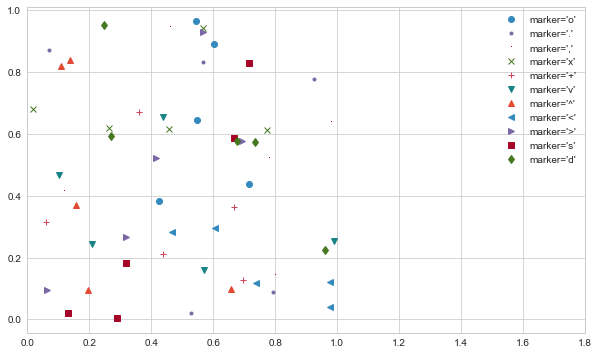

In [4]:
# 基本ライブりーの導入

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

fig = plt.figure(figsize=(10,6))  # plt.figure(figsize=(x,y)) 

# Markerのリスト。使途：散布図
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

/var/folders/87/p_stfc6x4csffq54vxcqlds00000gn/T/ipykernel_9925/3017214318.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();  # 色のコントラストバーを表示


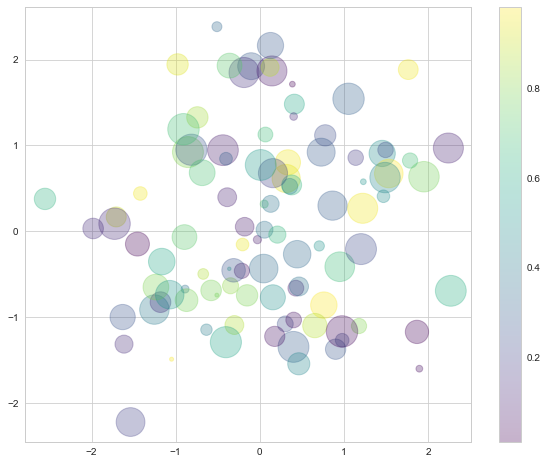

In [5]:
# plt.scatter和plt.plot的主要区别在于，plt.scatter可以针对每个点设置不同属性（大小、填充颜色、边缘颜色等），还可以通过数据集合对这些属性进行设置。

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # 色のコントラストバーを表示

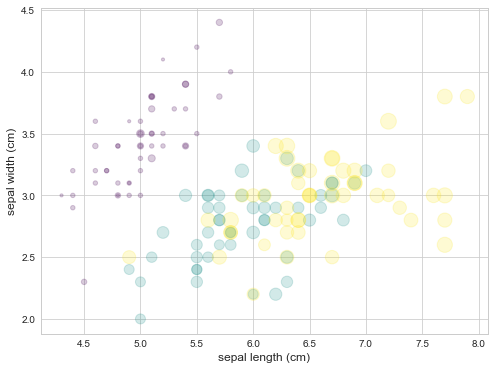

In [6]:
# もうひとつの具体例をみる。

# 通过散点图同时展示该数据集的四个不同维度：图中的(x, y)位置代表每个样本的花萼的长度和宽度，散点的大小代表每个样本的花瓣的宽度，
# 而散点的颜色代表一种特定的鸢尾花类型。如上图的多种颜色和多种属性的散点图对于我们分析和展示数据集时都非常有帮助。

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

fig = plt.figure(figsize=(8,6))  # plt.figure(figsize=(x,y)) 
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

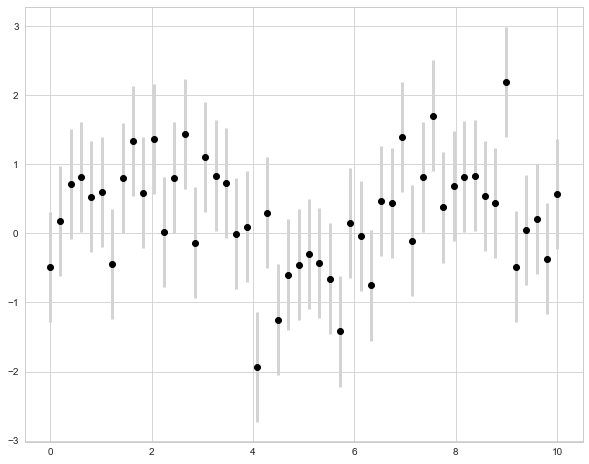

In [7]:
# 誤差バーの表現

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

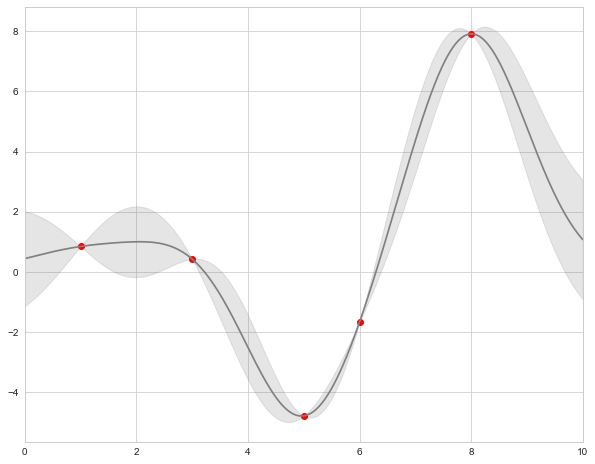

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和一些符合模型的点
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程回归，使其符合 fit 数据点
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 两倍sigma ~ 95% 确定区域

# 可视化结果
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

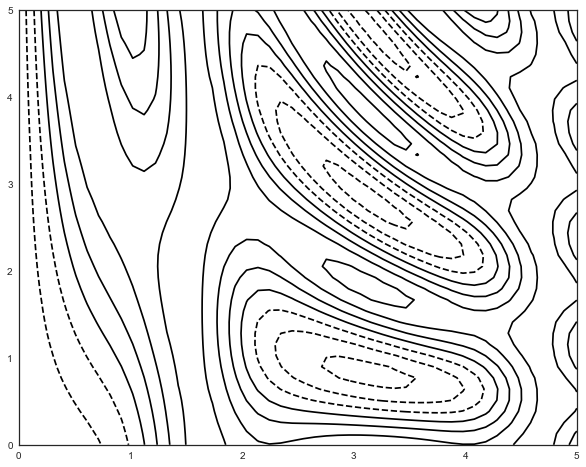

In [9]:
# ２D図に３D表現

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.contour(X, Y, Z, colors='black');

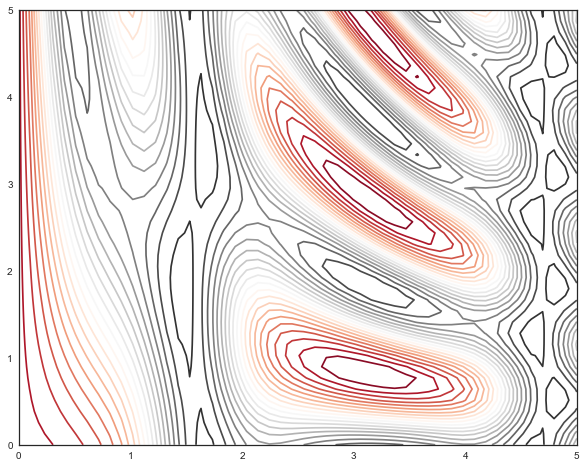

In [10]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.contour(X, Y, Z, 20, cmap='RdGy');

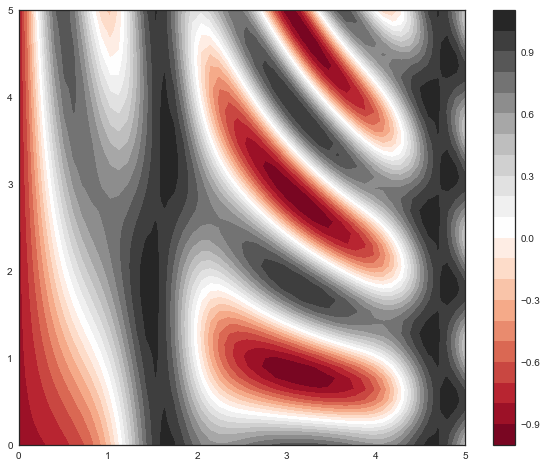

In [11]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

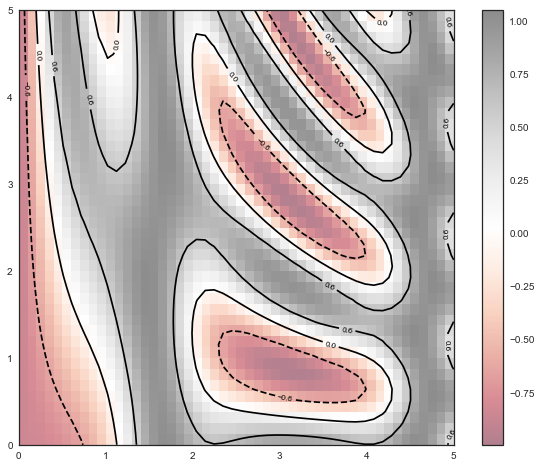

In [12]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

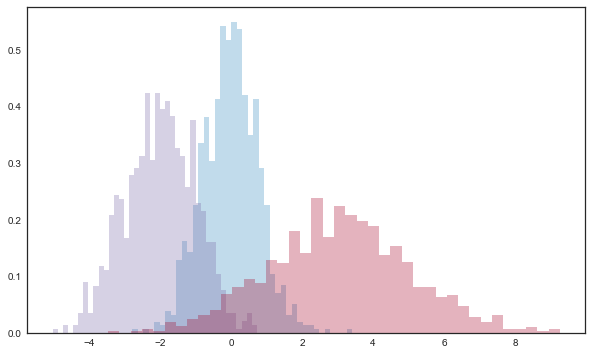

In [13]:
# HIST plot

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

fig = plt.figure(figsize=(10,6))  # plt.figure(figsize=(x,y)) 
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

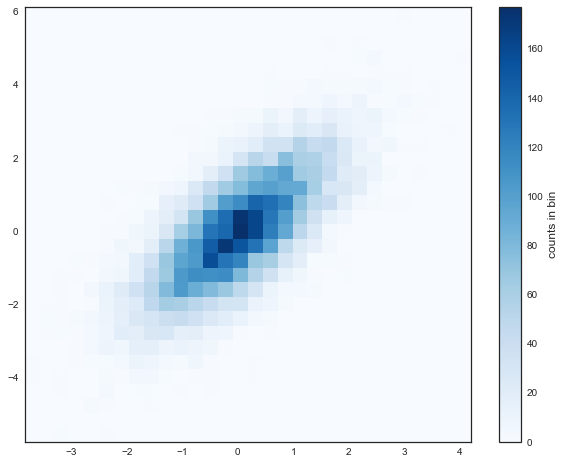

In [14]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

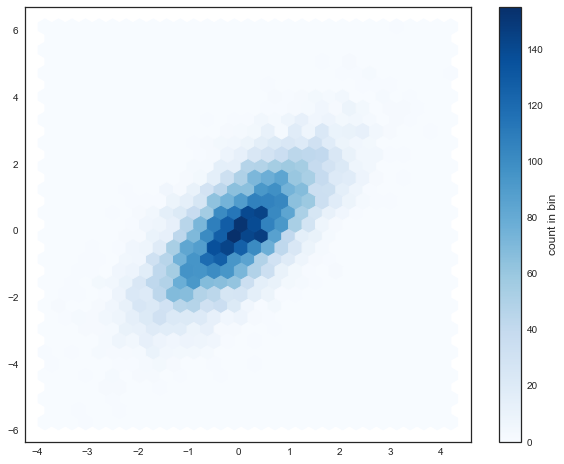

In [15]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

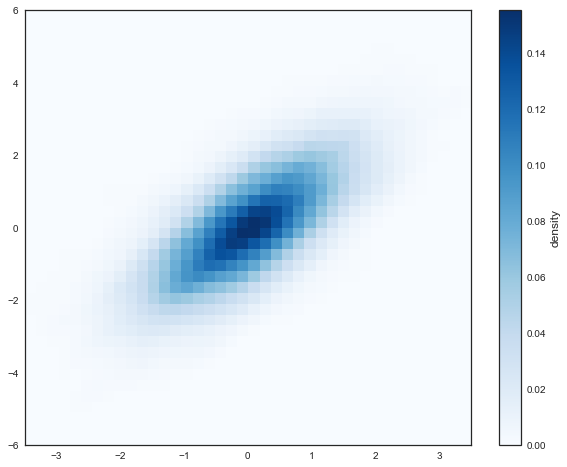

In [16]:
from scipy.stats import gaussian_kde

# 产生和处理数据，初始化KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的网格中计算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 将图表绘制成一张图像
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

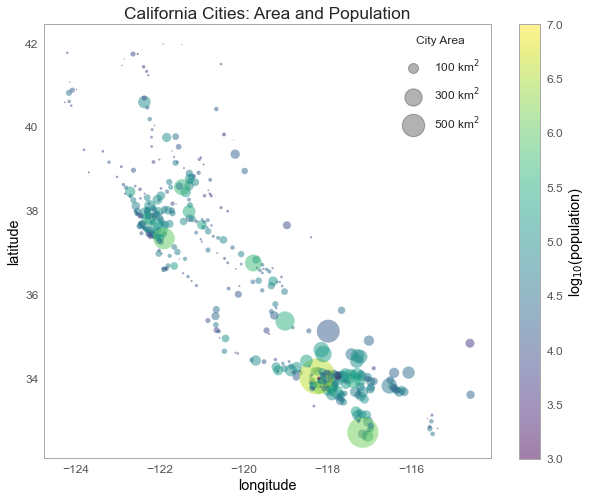

In [17]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

from astropy.visualization import astropy_mpl_style
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)

import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import
cities = pd.read_csv("./data/california_cities.csv")

# 提取我们感兴趣的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 绘制散点图，使用尺寸代表面积，颜色代表人口，不带标签
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 

plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('scaled')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面我们创建图例.使用空列表绘制图例中的散点，使用不同面积和标签，带透明度

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

### MNISTの例

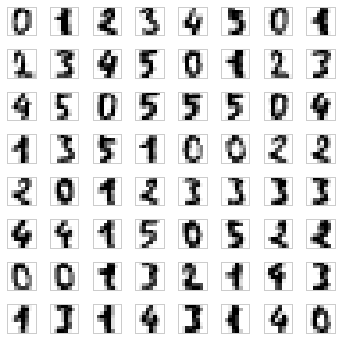

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# 读取数字0-5的手写图像，然后使用Matplotlib展示头64张缩略图
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/var/folders/87/p_stfc6x4csffq54vxcqlds00000gn/T/ipykernel_9925/2767489503.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=range(6), label='digit value')


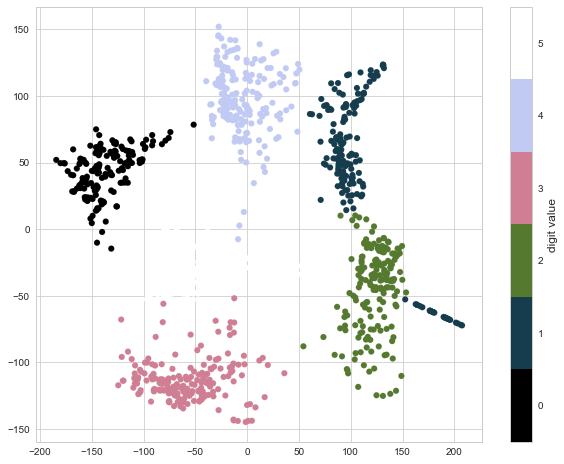

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# 使用Isomap将手写数字图像映射到二维流形学习中
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 绘制图表结果
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

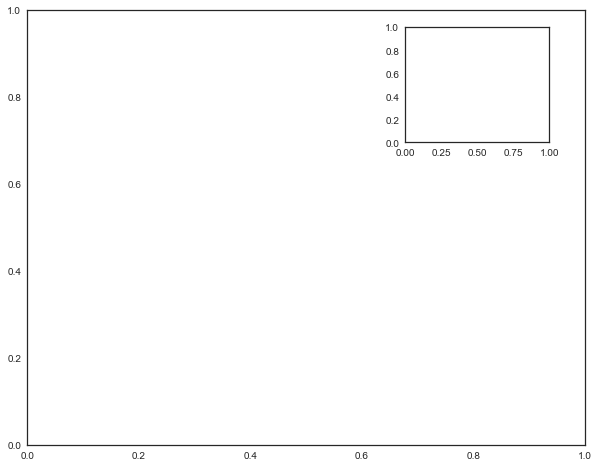

In [20]:
# Multi-plot

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax1 = plt.axes()  # 标准图表
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #子图表

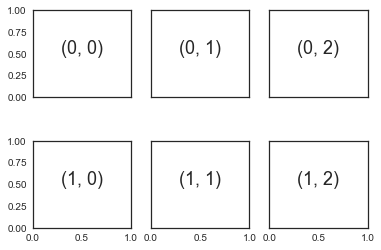

In [21]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# axes是一个2×3的数组，可以通过[row, col]进行索引访问
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

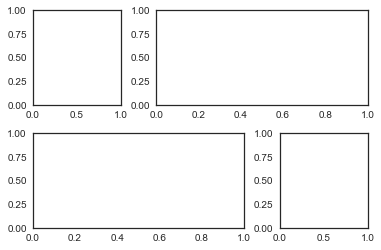

In [22]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

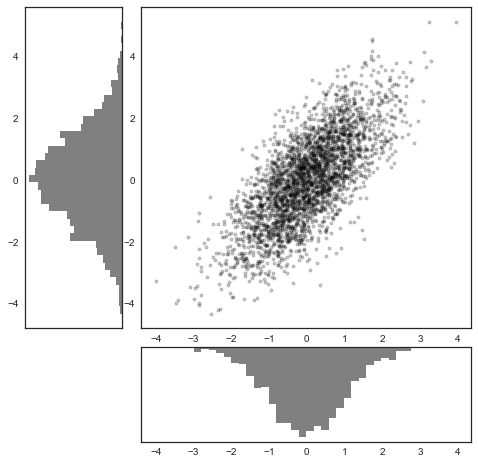

In [23]:
# 构建二维正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 使用GridSpec创建网格并加入子图表
fig = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 在主图表中绘制散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 分别在x轴和y轴方向绘制直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis() # x轴方向（右下）直方图倒转y轴方向

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis() # y轴方向（左上）直方图倒转x轴方向

### TextとLabel

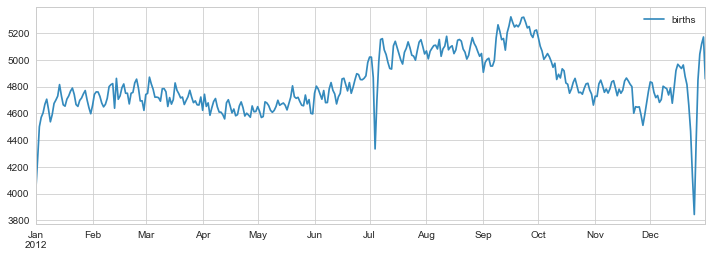

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from datetime import datetime

# Import
births = pd.read_csv("./data/births.csv")

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])

# This is old style to get warning msg. Solve it after adding "from datetime import datetime". 
#births_by_date.index = [pd.datetime(2012, month, day)
#                        for (month, day) in births_by_date.index]

births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]


from ipykernel import kernelapp as app
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

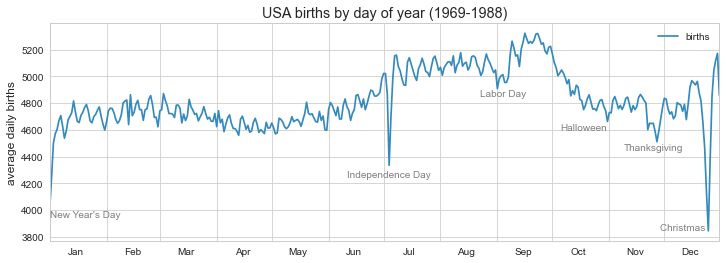

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在折线的特殊位置标注文字
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置标题和y轴标签
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置x轴标签月份居中
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

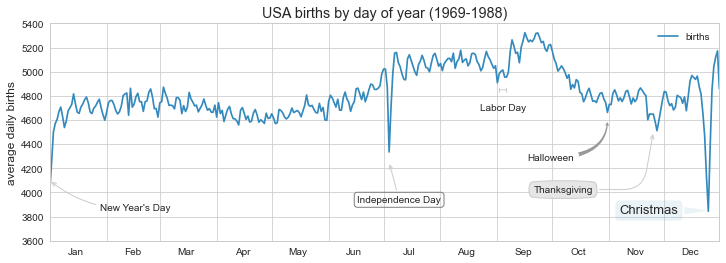

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 为图表添加标注
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 设置图表标题和坐标轴标记
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置月份坐标居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

'\nax.annotate(\'local minimum\', xy=(5 * np.pi, -1), xytext=(2, -6),\n            arrowprops=dict(arrowstyle="->",\n                            connectionstyle="angle3,angleA=0,angleB=-90"))\n'

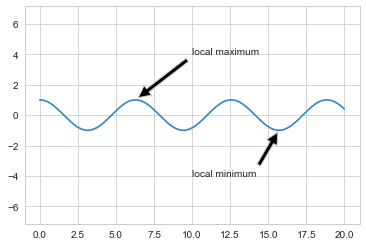

In [27]:
# 補足
# annotate function.

%matplotlib inline

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))


ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(10, -4),
            arrowprops=dict(facecolor='black', shrink=0.05))

"""
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
"""                           

### 3D

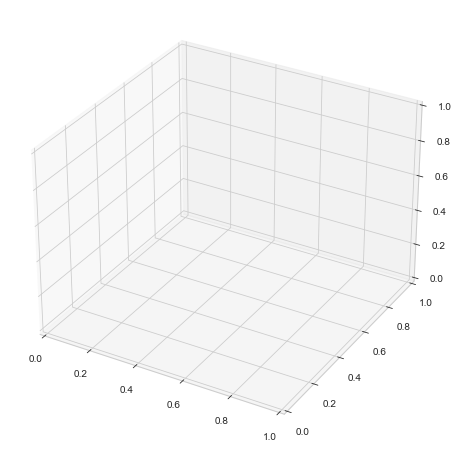

In [28]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')

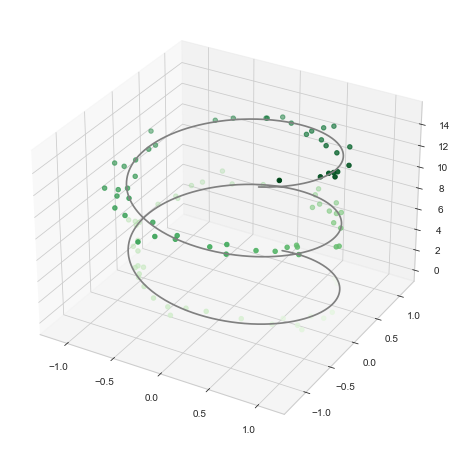

In [29]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')

# 三维螺旋线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')


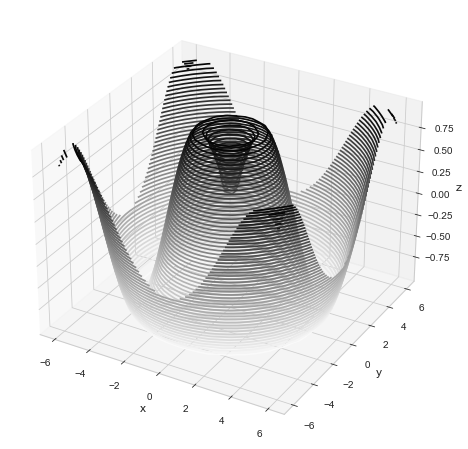

In [30]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

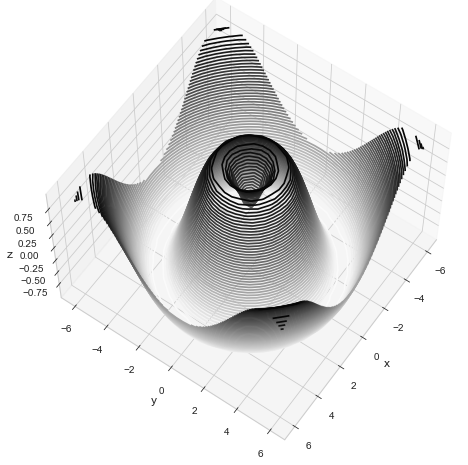

In [31]:
# Adjust view angle.

ax.view_init(60, 35)
fig

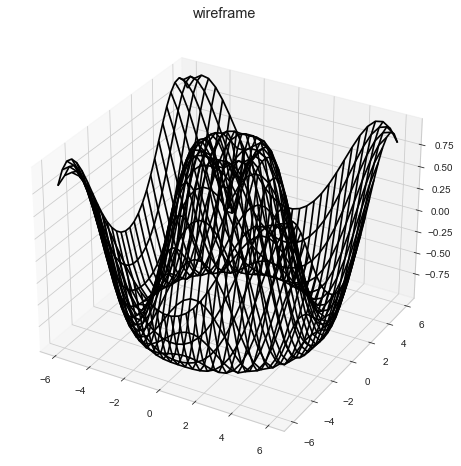

In [32]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

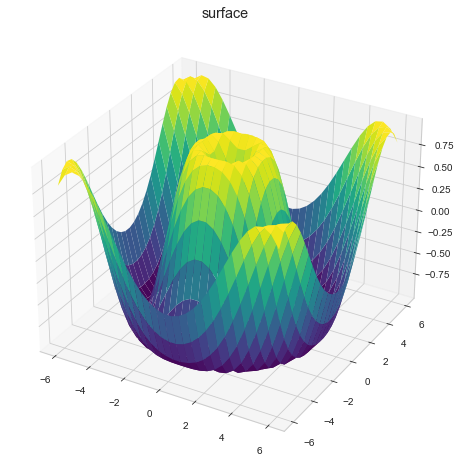

In [33]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

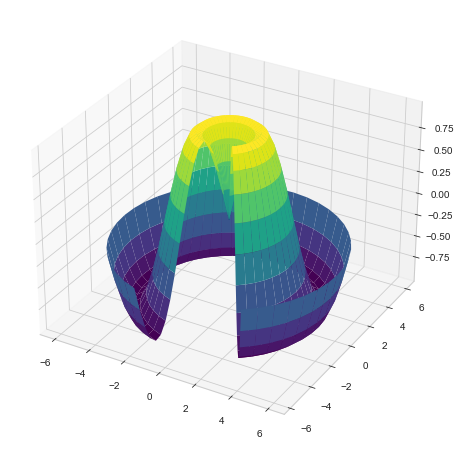

In [34]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');


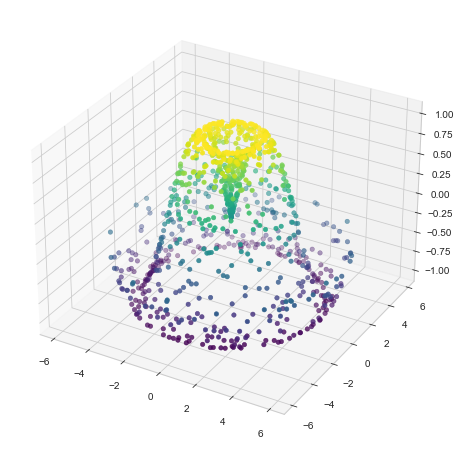

In [35]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

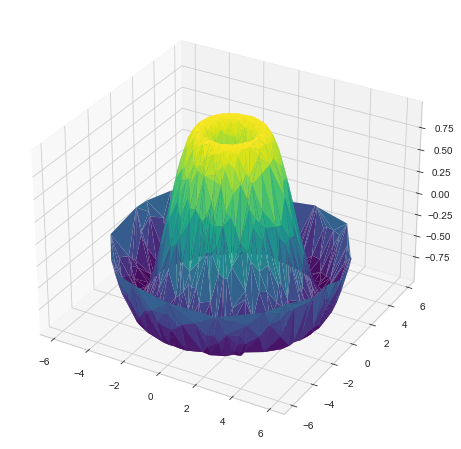

In [36]:
fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

### Mobius sample

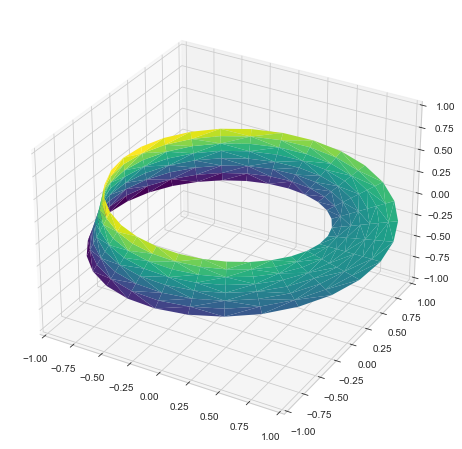

In [37]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

# r是坐标点距离环形中心的距离值
r = 1 + w * np.cos(phi)
# 利用简单的三角函数知识算得x，y，z坐标值
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

# 在底层参数的基础上进行三角剖分
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

fig = plt.figure(figsize=(10,8))  # plt.figure(figsize=(x,y)) 
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);

### Useful matplotlib

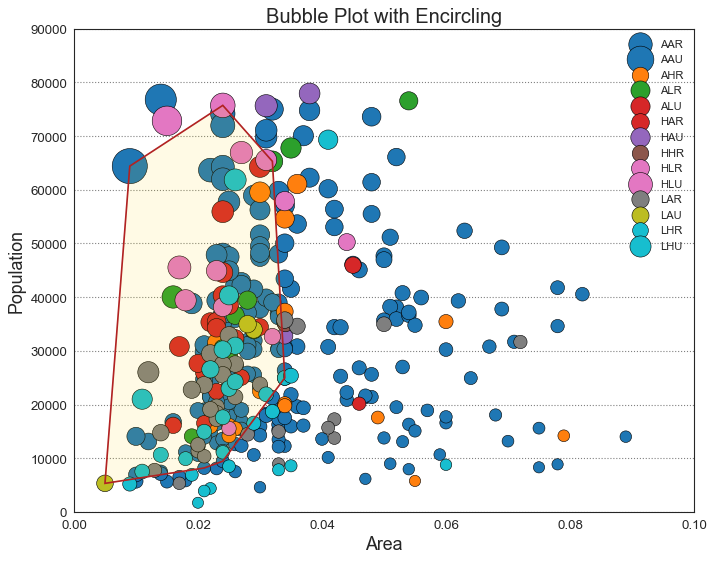

In [38]:
# !pip install brewer2mpl

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("./data/midwest_filter.csv") # https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=18)
plt.legend(fontsize=10)    
plt.grid(axis='y',linestyle='dotted', color='grey', linewidth=1) # axis='both'
plt.show()    

In [39]:
# Version
print(mpl.__version__) 
print(sns.__version__) 

3.5.1
0.11.2


/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/npcompat.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) >= "1.20.0":
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pdcompat.py:45: DeprecationWarning: distutils Version classes are deprecated. Use packagin

Text(0.5, 1.0, 'Scatterplot with line of best fit grouped by number of cylinders')

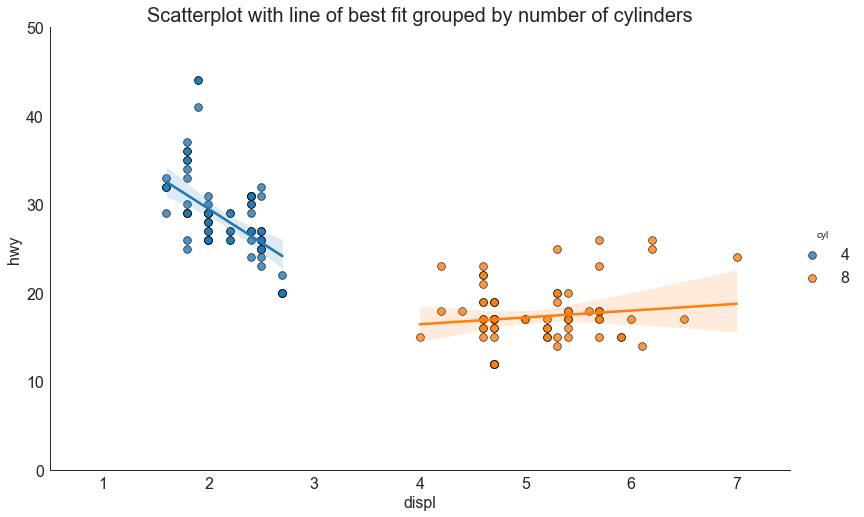

In [40]:
# Plot with regression simulation

# !pip install brewer2mpl
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

import xarray as xr

# Import Data
#df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df = pd.read_csv("./data/mpg_ggplot2.csv")

df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)


# Warning msg solution not ready. https://stackoverflow.com/questions/71666214/deprecation-warnings-distutils-and-netcdf-file

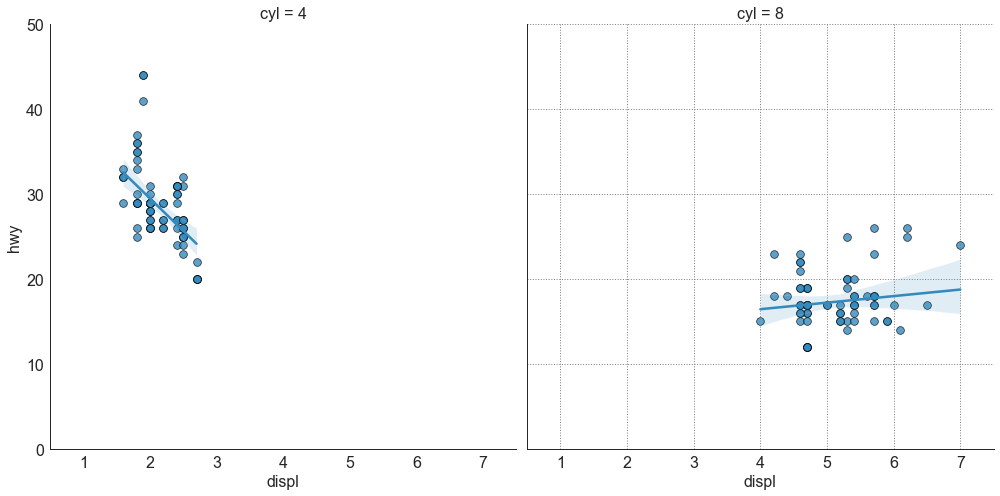

In [41]:
# Or, seperate them to plot.

# Import Data
df = pd.read_csv("./data/mpg_ggplot2.csv")   # https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.grid(axis='both',linestyle='dotted', color='grey', linewidth=1) # axis='x','Y'or'both'
plt.show()

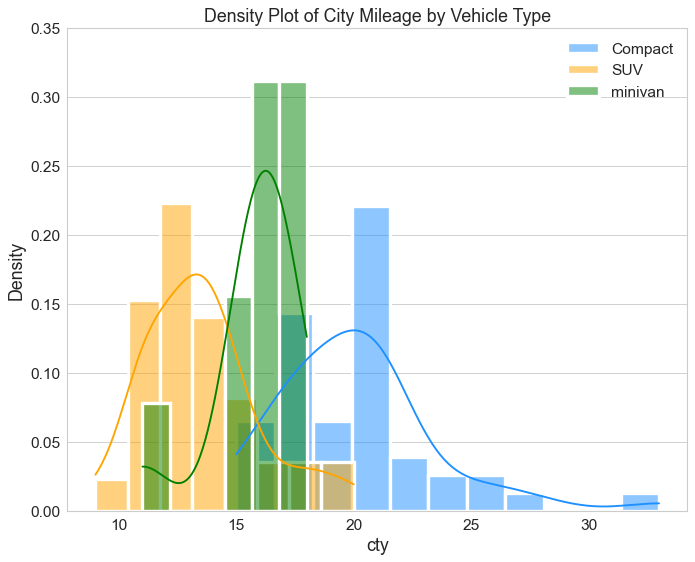

In [42]:
# 

# !pip install brewer2mpl
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import Data
df = pd.read_csv("./data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(10,8), dpi= 80)

"""
FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 
Please adapt your code to use either `displot` (a figure-level function with similar flexibility) 
or `histplot` (an axes-level function for histograms).

To Use: histplot instead of distplot and add the keyword args kde=True, stat="density", linewidth=0
"""
# Old style. Solved warning msg by "histplot instead of disploy" and add the keyword args.
#sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
#sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
#sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

sns.histplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", kde=True, stat="density", linewidth=3)
sns.histplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", kde=True, stat="density", linewidth=3)
sns.histplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", kde=True, stat="density", linewidth=3)

plt.ylim(0, 0.35)

# Decoration  best fontsize ciontrol.
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=16)
plt.legend(fontsize=14)    
plt.grid(axis='x',linestyle='dotted', color='grey', linewidth=0) # axis='both'
plt.show()  

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


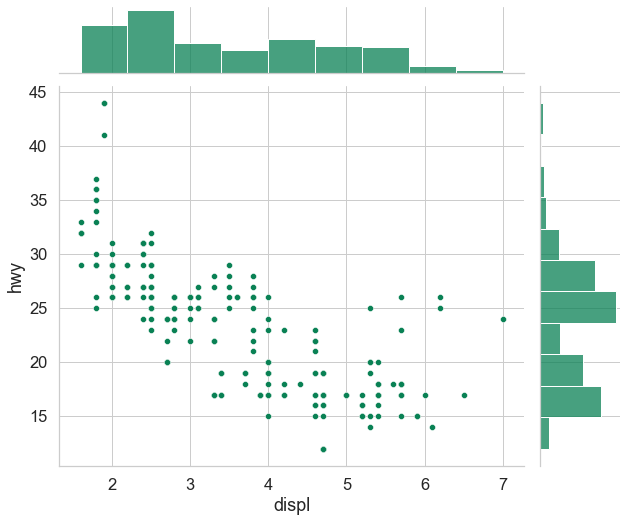

In [43]:
# Seaborn is super consis for plot.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

df = pd.read_csv("./data/mpg_ggplot2.csv")
sns.set(style="whitegrid", font_scale=1.5)  #设置主题，文本大小
g = sns.jointplot(
    x='displ',
    y='hwy',
    data=df,  #输入两个绘图变量
    color='#098154',  #修改颜色
)
g.fig.set_size_inches(10, 8)  #设置图尺寸

In [44]:
# !pip install joypy

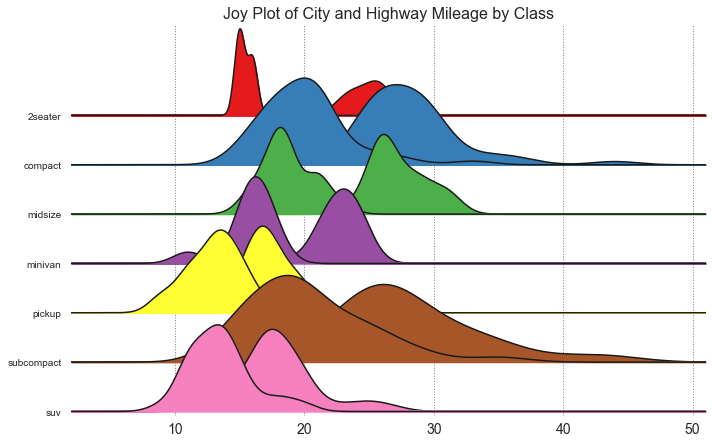

In [45]:
# Joy plot
# !pip install joypy#安装依赖包
#每组数据绘制核密度图，R中有ggjoy

import joypy


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import Data
mpg = pd.read_csv("./data/mpg_ggplot2.csv")

# Draw Plot
#plt.figure(figsize=(10, 8), dpi=80)
fig, axes = joypy.joyplot(mpg,
                          column=['hwy', 'cty'],
                          by="class",
                          ylim='own',
                          colormap=plt.cm.Set1,
                          figsize=(10, 6))

# Decoration  best fontsize ciontrol.
plt.xticks(fontsize=14); plt.yticks(fontsize=14)  # yticks appear can NOT be changed.
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=16)
#plt.legend(fontsize=14)    
plt.grid(axis='x',linestyle='dotted', color='grey', linewidth=1) # axis='both'
plt.show()  

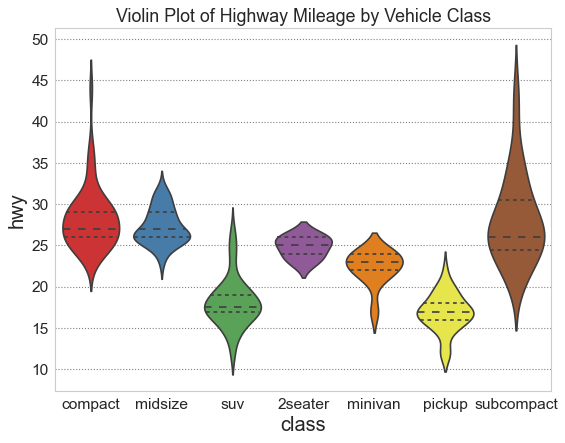

In [46]:
# Violin Plot

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import Data
df = pd.read_csv("./data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(8, 6), dpi=80)
sns.violinplot(x='class',
               y='hwy',
               data=df,
               scale='width',
               palette='Set1',
               inner='quartile')

# Decoration
plt.xticks(fontsize=14); plt.yticks(fontsize=14) 
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=16)
#plt.legend(fontsize=14)   
plt.grid(axis='y',linestyle='dotted', color='grey', linewidth=1) # axis='both'
plt.show() 


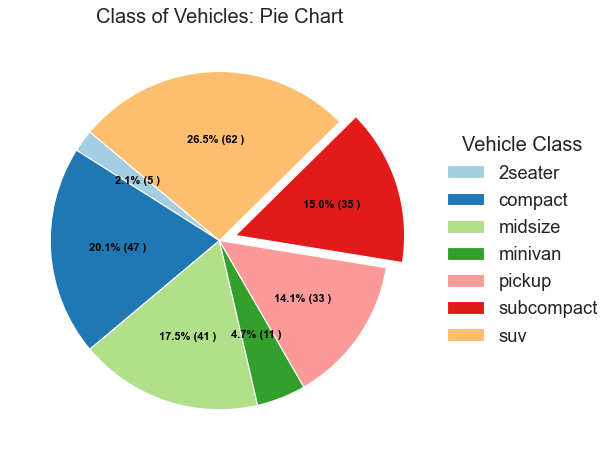

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7),
                       subplot_kw=dict(aspect="equal"),
                       dpi=80)

data = df['counts']
categories = df['class']
explode = [0, 0, 0, 0, 0, 0.1, 0]


def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="black"),
                                  colors=plt.cm.Paired.colors,
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges,
          categories,
          title="Vehicle Class",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

In [48]:
# pip install squarify

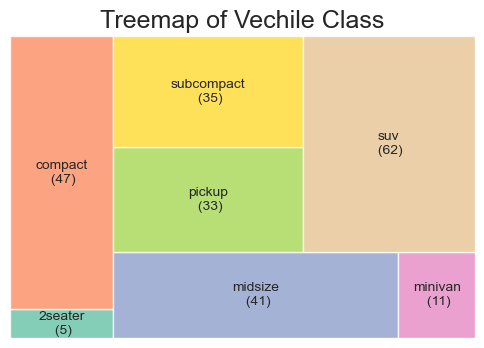

In [49]:
# !pip install squarify#安装依赖包
import squarify

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import Data
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Set2(i / float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(6, 4), dpi=100)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

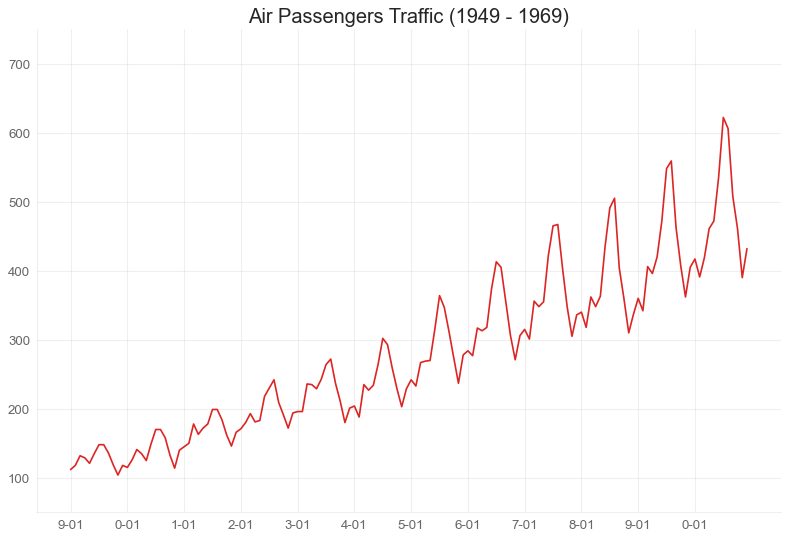

In [50]:


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import Data
df = pd.read_csv('./data/AirPassengers.csv')
# Draw Plot
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(df['Month'], df['#Passengers'], color='#dc2624')

# Decoration
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df['Month'].tolist()[::12]]
plt.xticks(ticks=xtick_location,
           labels=xtick_labels,
           rotation=0,
           fontsize=12,
           horizontalalignment='center',
           alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=18)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

### 自己回帰及び部分自己回帰　（Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot）

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


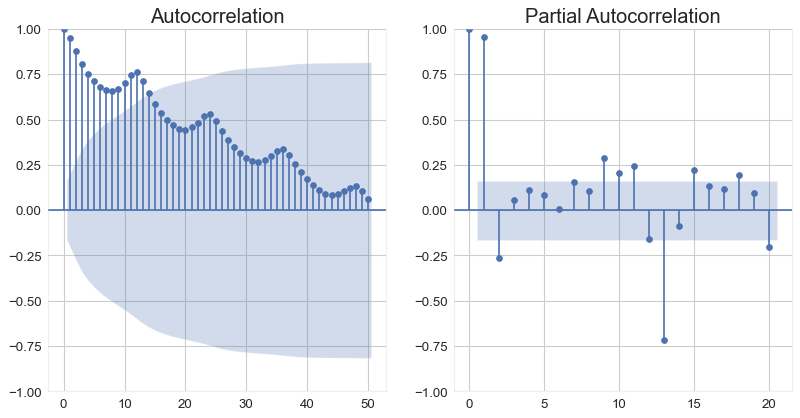

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
df = pd.read_csv('./data/AirPassengers.csv')

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=80)
plot_acf(df['#Passengers'].tolist(), ax=ax1, lags=50)
plot_pacf(df['#Passengers'].tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3)
ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3)
ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3)
ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3)
ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

<Figure size 960x560 with 0 Axes>

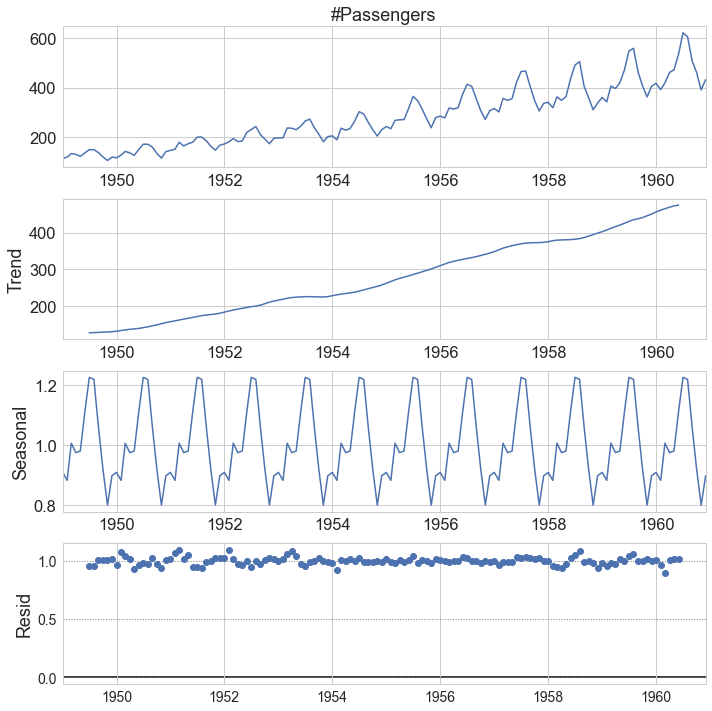

In [52]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('./data/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['Month']])
df.set_index(dates, inplace=True)

# Decompose
result = seasonal_decompose(df['#Passengers'], model='multiplicative')

# Plot
plt.figure(figsize=(12, 7), dpi=80)
plt.rcParams.update({'figure.figsize': (10, 10)})
#result.plot().suptitle('Time Series Decomposition of Air Passengers')
result.plot()


plt.xticks(fontsize=14); plt.yticks(fontsize=14) 
#plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=16)
#plt.legend(fontsize=14)   
plt.grid(axis='y',linestyle='dotted', color='grey', linewidth=1) # axis='both'
plt.show() 

### 双坐标系时间序列图（Plotting with different scales using secondary Y axis）

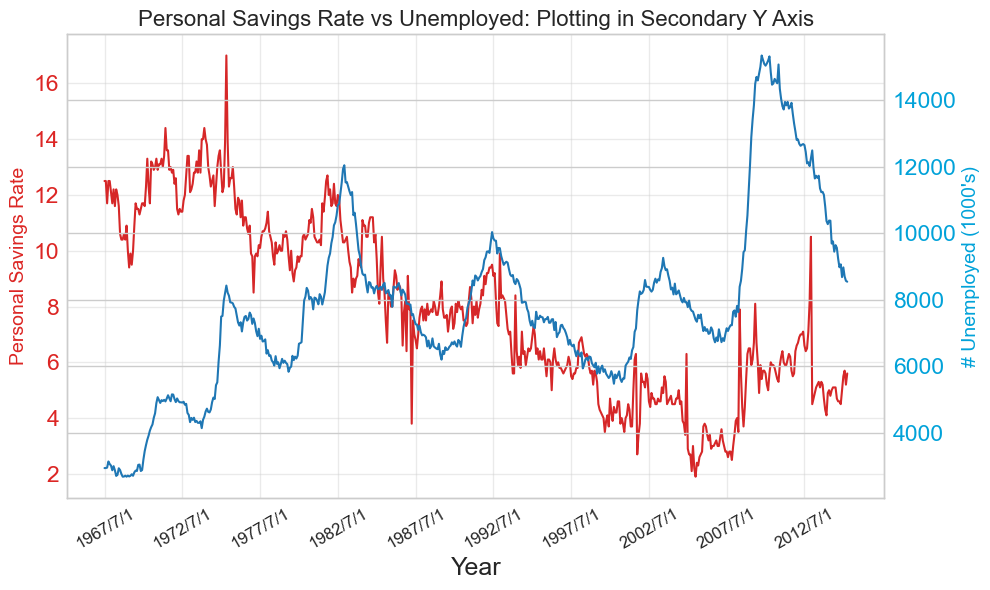

In [53]:
# Dual Y.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import Data: https://github.com/selva86/datasets/blob/master/economics.csv
df = pd.read_csv("./data/economics.csv")

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=18)
ax1.tick_params(axis='x', rotation=30, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='#dc2624', fontsize=14)
ax1.tick_params(axis='y', rotation=0, labelcolor='#dc2624')
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='#01a2d9', fontsize=14)
ax2.tick_params(axis='y', labelcolor='#01a2d9')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize': 10})
ax2.set_title(
    "Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis",
    fontsize=16)
fig.tight_layout()

plt.show() 


### 带误差阴影的时间序列图（Time Series with Error Bands）

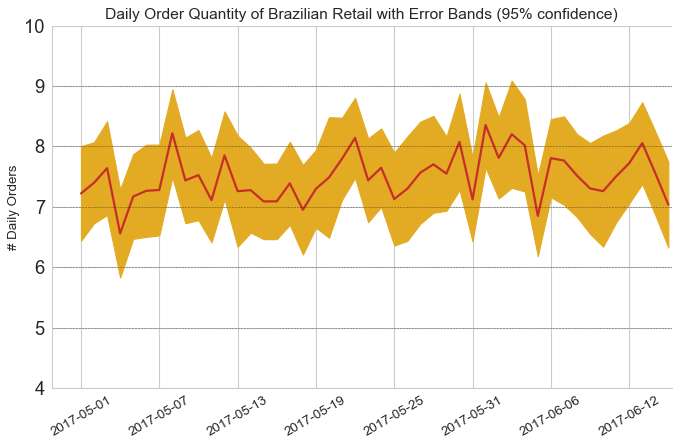

In [54]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from dateutil.parser import parse
from scipy.stats import sem

# Import Data
df_raw = pd.read_csv('./data/orders_45d.csv',
                     parse_dates=['purchase_time', 'purchase_date'])

# Prepare Data: Daily Mean and SE Bands
df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(10, 6), dpi=80)
plt.ylabel("# Daily Orders", fontsize=12)
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x, df_mean, color="#c72e29", lw=2)
plt.tick_params(axis='x', rotation=30, labelsize=10)
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#e3aa24") #f8f2e4

# google カラー選択ツール: https://g.co/kgs/irYHBp

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]], fontsize=12)
plt.title(
    "Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)",
    fontsize=14)

# Axis limits
s, e = plt.gca().get_xlim()
plt.xlim(s, e - 2)
plt.ylim(4, 10)

# Draw Horizontal Tick lines
for y in range(5, 10, 1):
    plt.hlines(y,
               xmin=s,
               xmax=e,
               colors='black',
               alpha=0.5,
               linestyles="--",
               lw=0.5)

plt.show()

## 相関図

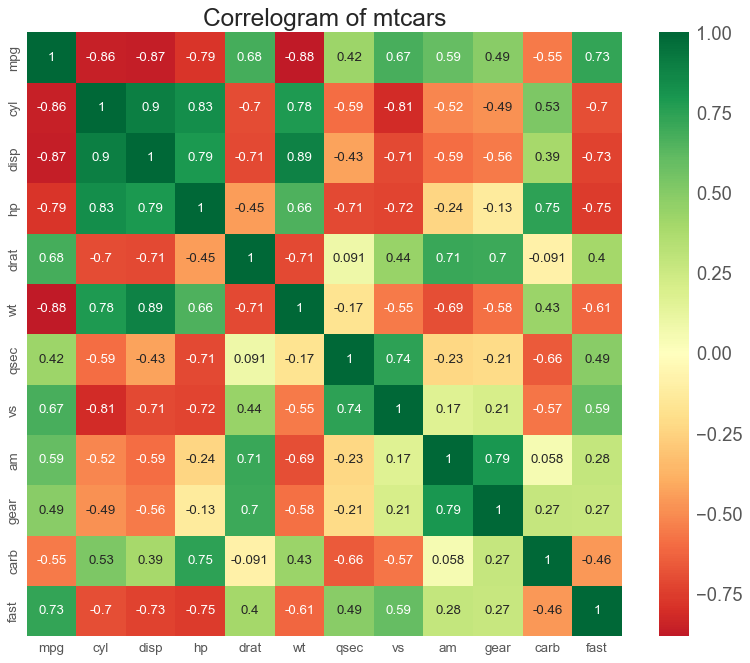

In [55]:
# 相関図

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Import Dataset
#df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = pd.read_csv("./data/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 800x640 with 0 Axes>

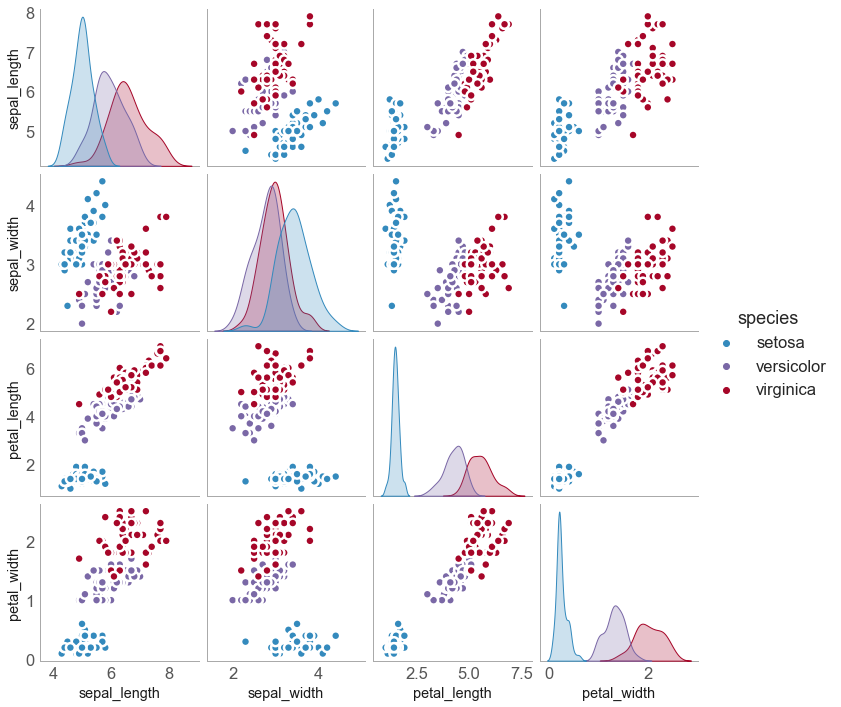

In [56]:
# Matrix plot.

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 800x640 with 0 Axes>

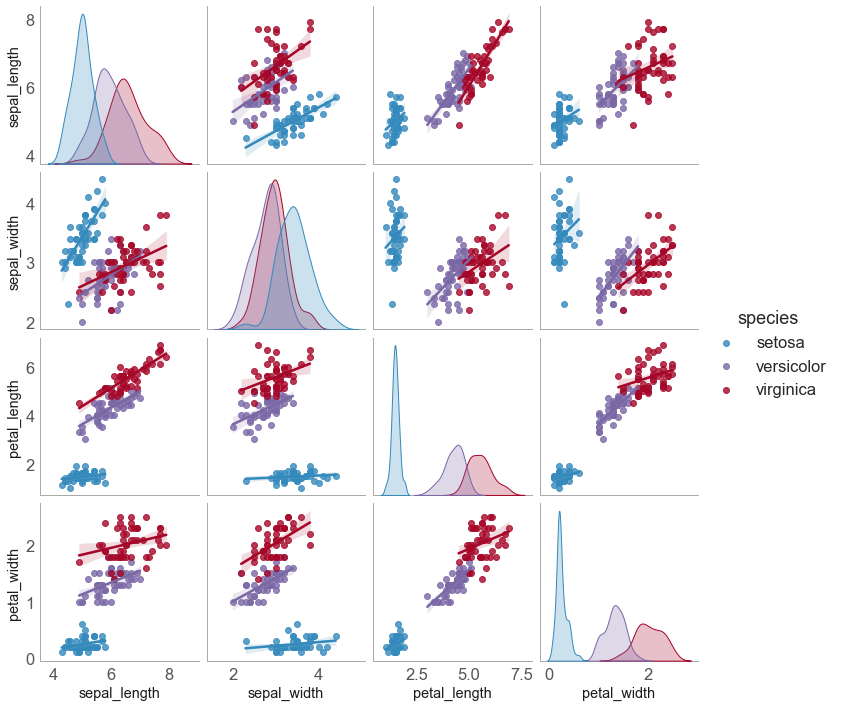

In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

## Seaborn polynomial regression simulation (多项式回归拟合曲线)

In [58]:
!pip install palettable

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


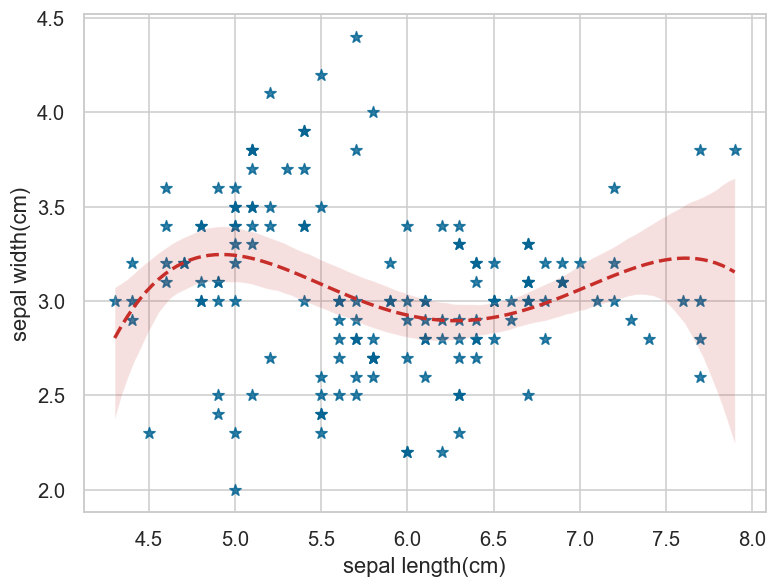

In [59]:
# !pip install palettable

#导入本帖要用到的库，声明如下：
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import palettable
from pandas import Series,DataFrame
from sklearn import datasets
import seaborn as sns
import palettable

#导入鸢尾花iris数据集（方法一）,该方法更有助于理解数据集
iris=datasets.load_iris()
x, y =iris.data,iris.target
y_1 = np.array(['setosa' if i==0 else 'versicolor' if i==1 else 'virginica' for i in y])
pd_iris = pd.DataFrame(np.hstack((x, y_1.reshape(150,1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])
 
#astype修改pd_iris中数据类型object为float64
pd_iris['sepal length(cm)']=pd_iris['sepal length(cm)'].astype('float64')
pd_iris['sepal width(cm)']=pd_iris['sepal width(cm)'].astype('float64')
pd_iris['petal length(cm)']=pd_iris['petal length(cm)'].astype('float64')
pd_iris['petal width(cm)']=pd_iris['petal width(cm)'].astype('float64')

plt.figure(dpi=110)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.regplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             marker='*',
             order=4,#默认为1，越大越弯曲
             scatter_kws={'s': 60,'color':'#016392',},#设置散点属性，参考plt.scatter
             line_kws={'linestyle':'--','color':'#c72e29'}#设置线属性，参考 plt.plot
             )


/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 800x600 with 0 Axes>

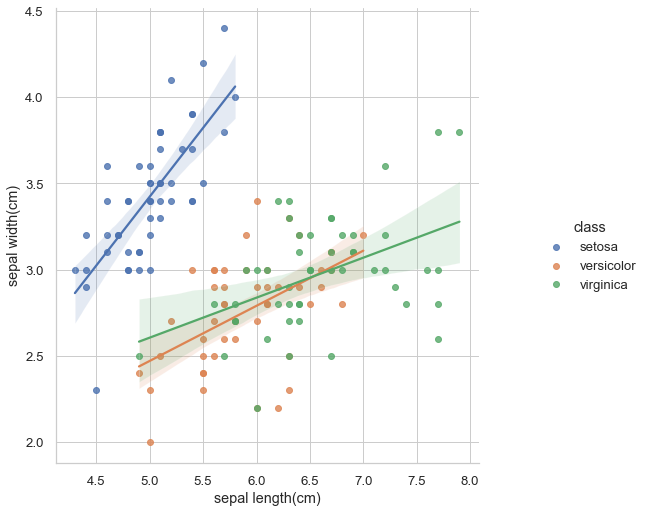

In [60]:
# Regrasion by Variales

plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             hue='class',
             )
g.fig.set_size_inches(10,8)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 800x600 with 0 Axes>

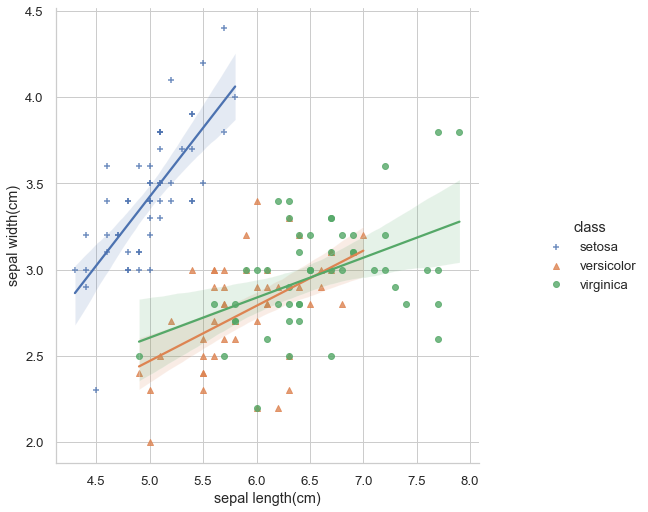

In [61]:
# scatter plot

plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             hue='class',
             markers=['+','^','o'],   #设置散点marker          
             )
g.fig.set_size_inches(10,8)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 800x600 with 0 Axes>

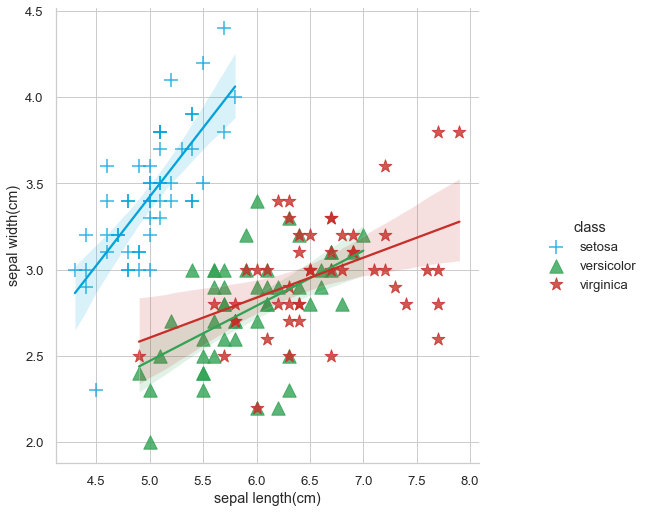

In [62]:
# scatter with colors

plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             hue='class',
             markers=['+','^','*'],
             scatter_kws={'s':180},
             palette=["#01a2d9", "#31A354", "#c72e29"],#调色盘
             )
g.fig.set_size_inches(10,8)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<Figure size 800x600 with 0 Axes>

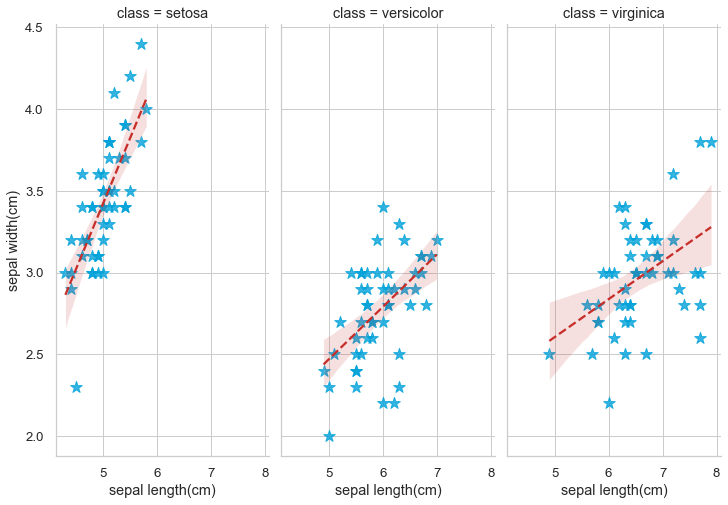

In [63]:
# Subplots

plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             col='class',#按class绘制分面图
             markers='*',
             scatter_kws={'s':150,'color':'#01a2d9'},
             line_kws={'linestyle':'--','color':'#c72e29'},#直线属性设置
             )
g.fig.set_size_inches(10,8)